In [118]:
import numpy as np
import matplotlib.pyplot as plt
import glob
# import tensorflow as tf
import pickle

from tensorboard.backend.event_processing.event_file_loader import RawEventFileLoader, EventFileLoader

def eventfile_to_dict(file,filters=['reward','episodes_','step']):
    output = {}
    # for e in tf.compat.v1.train.summary_iterator(file):
    for e in EventFileLoader(file).Load():
        for v in e.summary.value:
            if any([key in v.tag for key in filters]):
                if v.tag in output:
                    output[v.tag].append(v.tensor.float_val)
                else:
                    output[v.tag] = [v.tensor.float_val]
    return output

def visualize(run, savename=None):
    log = eventfile_to_dict(glob.glob(f'../data/ray_results/*{run}*/events*')[0])
    data = {}
    data['episode_reward_mean'] = np.array(log['ray/tune/episode_reward_mean'])
    data['timesteps_total'] = np.array(log['ray/tune/timesteps_total'])
    print(data.keys())
    plt.figure(figsize=(6,2.5))
    plt.plot(data['timesteps_total'],data['episode_reward_mean'])
    plt.xlabel('Training steps')
    plt.ylabel('$-\log_{10}(1-F)$')
    plt.grid()
    plt.tight_layout()
    
    if savename:
        plt.savefig(f'figs/{savename}_learningcurve.png',dpi=200)
        pickle.dump(data, open(f'data/{savename}_log.pkl', 'wb'))
        
        
def save_eventlog(run):
    path = f'../data/ray_results/*{run}*'
    files = glob.glob(f'{path}/events*')
    param_file = glob.glob(f'{path}/params.pkl')[0]
    print(files)
    if len(files) != 1:
        print(f'{path}/events*')
        raise ValueError
    log = eventfile_to_dict(files[0])
    data = {}
    for key in log.keys():
        val = np.array(log[key]).flatten()
        if 0 not in val.shape:
            data[key.replace('ray/tune/','')] = val
    pickle.dump(data, open(param_file.replace('params','eventlog'), 'wb'))
    
def get_eventlog(run,verbose=False):
    files = glob.glob(f'../data/ray_results/*{run}*/eventlog.pkl')
    if len(files) != 1:
        print(f'../data/ray_results/*{run}*/eventlog.pkl')
        raise ValueError
    if verbose: print(files[0].replace('../data/ray_results/',''))
    return pickle.load(open(files[0], 'rb'))

def lighten_color(color, amount=0.5,alpha=None):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    res = colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])
    if alpha is None:
        return res
    else:
        return res+tuple([alpha])
    
def smooth(y,binsize=100):
    imax = len(y)-len(y)%binsize
    return y[:imax].reshape(-1,binsize).mean(1)

plt.rc('font',**{'family':'serif','serif':['Helvetica'],'size':18})
plt.rc('text', usetex=True)

# Save eventlog

In [37]:
run_eps = ['0392_4200_highres12','2104_4200_highres16','2520_4000_highres14',
           '1732_3400_highres8','7695_4200_highres20','7734_2800_highres8']

In [48]:
run = '2520'
path = f'../data/ray_results/*{run}*'
files = glob.glob(f'{path}/events*')
param_file = glob.glob(f'{path}/params.pkl')[0]
log = eventfile_to_dict(files[0])

In [53]:
pickle.dump(log, open(param_file.replace('params','eventlog'), 'wb'))

In [51]:
for key in log.keys():
    log[key] = np.array(log[key])

In [64]:
log.keys()

dict_keys(['ray/tune/episode_reward_max', 'ray/tune/episode_reward_min', 'ray/tune/episode_reward_mean', 'ray/tune/episodes_this_iter', 'ray/tune/num_agent_steps_sampled', 'ray/tune/num_agent_steps_trained', 'ray/tune/num_env_steps_sampled', 'ray/tune/num_env_steps_trained', 'ray/tune/num_env_steps_sampled_this_iter', 'ray/tune/num_env_steps_trained_this_iter', 'ray/tune/timesteps_total', 'ray/tune/num_steps_trained_this_iter', 'ray/tune/agent_timesteps_total', 'ray/tune/episodes_total', 'ray/tune/timesteps_since_restore', 'ray/tune/info/num_env_steps_sampled', 'ray/tune/info/num_env_steps_trained', 'ray/tune/info/num_agent_steps_sampled', 'ray/tune/info/num_agent_steps_trained', 'ray/tune/sampler_results/episode_reward_max', 'ray/tune/sampler_results/episode_reward_min', 'ray/tune/sampler_results/episode_reward_mean', 'ray/tune/sampler_results/episodes_this_iter', 'ray/tune/hist_stats/episode_reward', 'ray/tune/counters/num_env_steps_sampled', 'ray/tune/counters/num_env_steps_trained'

In [72]:
# on juwels '0392','2104','1732','7734'
# done '2520','7695',
# for run in []: 
save_eventlog(2520)
save_eventlog(7695)

['../data/ray_results/2022-11-30_ZXp90_workers4_IBMvalencia_q10_seed167_chan12_TISE_dur1120dt_seg20_sub0.1_avg_2520_aob57l1u/events.out.tfevents.1669858817.honamnguyen-ThinkPad-E570']
['../data/ray_results/2022-12-06_ZXp90_linux_4w_IBMvalencia_q10_seed167_chan12_TISE_dur800dt_seg20_sub0.2_avg_7695_7570lbwn/events.out.tfevents.1670394437.honamnguyen-ThinkPad-E570']


# Main learning curves

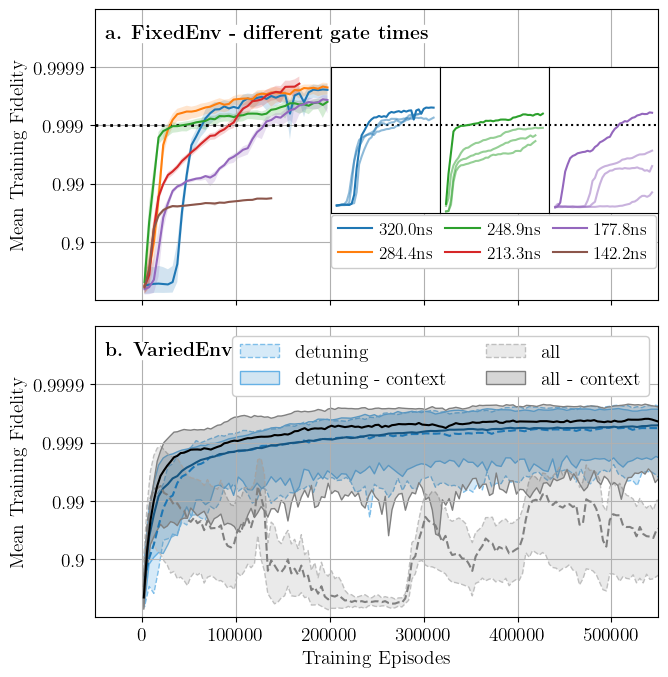

In [404]:
# fig, axs = plt.subplots(2,1,figsize=(7,7),sharex=True)
# imax = 40

# ############ 1ST PLOT ##############
# axs[0].hlines(3,-5e4,5.5e5,'k',ls=':',linewidth=2)
# for i,data in enumerate(datas[0]):
#     # x = smooth(data['timesteps_total'])
#     x = smooth(data['episodes_total'])[:imax]
#     axs[0].plot(x,smooth(data['episode_reward_mean'])[:imax],label=f'{gatetimes[i]:.1f}ns')
#     axs[0].fill_between(x,smooth(data['episode_reward_min'])[:imax],smooth(data['episode_reward_max'])[:imax],
#                         alpha=0.2)

#  # axs[0].legend(loc='lower right',framealpha=1,ncol=3,handletextpad=0.4,columnspacing=0.5)
# axs[0].legend(loc=[0.418,0.11],framealpha=1,ncol=3,handletextpad=0.4,columnspacing=0.65,fontsize=12.5)

# ##INSET##
# for i in range(3):
#     axins = axs[0].inset_axes([0.418+i*0.194,0.3,0.194,0.5])
#     axins.hlines(3,-0.1e5,2.1e5,'k',ls=':',linewidth=1.5)
#     for j,data in enumerate(inset_datas[i]):
#         alpha = 1 if j==0 else 0.5
#         x = smooth(data['episodes_total'])[:imax]
#         axins.plot(x,smooth(data['episode_reward_mean'])[:imax],f'C{2*i}',alpha=alpha)
#     # axins.set_xticks([2e5])
#     # axins.set_xticklabels(['2e5'])
#     axins.set_xticks([])
#     # axins.set_xticklabels([])
#     axins.set_yticks(np.arange(1,5,1))
#     axins.set_yticklabels([])
#     # axins.grid()
#     axins.tick_params(left=False,bottom=False)
#     axins.set_ylim(0,5)
#     axins.set_xlim(-0.1e5,2.1e5)
# ##INSET##


# ############ 2ND PLOT ##############

# ls = ['--','','--','']
# cs = [lighten_color('C0',1),lighten_color('C0',1.2),lighten_color('k',0.5),'k']
# hatchs = ['','','','']
# labels = ['detuning','detuning - context','all','all - context']
# for i,data in enumerate(datas[1]):
#     x = smooth(data['episodes_total'])
#     # x = smooth(data['timesteps_total'])
#     axs[1].plot(x,smooth(data['episode_reward_mean']),
#                 ls[i],color=cs[i],linewidth=1.5)
#     axs[1].fill_between(x,smooth(data['episode_reward_min']),smooth(data['episode_reward_max']),label=labels[i],
#                         ls=ls[i],facecolor=lighten_color(cs[i],0.8,0.2),edgecolor=lighten_color(cs[i],0.5),hatch=hatchs[i])    

# axs[1].legend(ncol=2,framealpha=1)
# axs[1].set_xlabel('Training Episodes')
# texts = ['\\textbf{a. FixedEnv - different gate times}','\\textbf{b. VariedEnv}']
# for i,ax in enumerate(axs):
#     ax.text(-4e4,4.5, texts[i], horizontalalignment='left',
#                 bbox=dict(facecolor='white', edgecolor='white', boxstyle='square,pad=0'))
#     ax.set_ylabel('Mean Training Fidelity')
#     ax.set_ylim(0,5)
#     ax.set_xlim(-5e4,5.5e5)
#     # ax.set_xlim(-5e5,10.5e6)
#     ax.set_yticks(np.arange(1,5,1))
#     ax.set_yticklabels(['$0.9$','$0.99$','$0.999$','$0.9999$'])
    
#     ax.grid()
# plt.tight_layout()
# # plt.subplots_adjust(wspace=0, hspace=0.05)
# # plt.savefig('figs/learning_curves.pdf',format='pdf')

In [357]:
# runs1 = ['0392','2104','2520','1732','7695','7734']
runs1 = ['0392','2104','2520','2813','7695','6052']
runs2 = ['4658','1891']
runs3 = ['9241','3723']
gatetimes = np.array([1440,1280,1120,960,800,640])*2/9
datas = [[get_eventlog(run,verbose=True) for run in runs1],
         [get_eventlog(run,verbose=True) for run in runs2],
         [get_eventlog(run,verbose=True) for run in runs3]]

runs1 = ['0392','6780','6285','2336']
runs2 = [2520,2126,'6592_f',7544,3475,2517]
runs3 = [7695,5886,1394,5731,7206,2470,5140,3893]
inset_datas = [[get_eventlog(run,verbose=True) for run in runs1],
               [get_eventlog(run,verbose=True) for run in runs2],
               [get_eventlog(run,verbose=True) for run in runs3]]

2023-02-28_ZXp90_juwels_4w_IBMvalencia_q10_seed1_chan12_TISE_dur1440dt_seg20_sub0.1_avg_0392_jrlt3ee9/eventlog.pkl
2023-02-28_ZXp90_juwels_4w_IBMvalencia_q10_seed167_chan12_TISE_dur1280dt_seg20_sub0.1_avg_2104_ary92rwf/eventlog.pkl
2022-11-30_ZXp90_workers4_IBMvalencia_q10_seed167_chan12_TISE_dur1120dt_seg20_sub0.1_avg_2520_aob57l1u/eventlog.pkl
2023-10-19_ZXp90_juwels_4w_IBMvalencia_q10_ratio10_chan12_TISE_dur960dt_seg20_sub0.2_average_seed6_2813_coqcwudw/eventlog.pkl
2022-12-06_ZXp90_linux_4w_IBMvalencia_q10_seed167_chan12_TISE_dur800dt_seg20_sub0.2_avg_7695_7570lbwn/eventlog.pkl
2023-06-29_ZXp90_juwels_4w_IBMvalencia_q10_seed167_chan12_TISE_dur640dt_seg20_sub0.2_avg_6052_32gu5eeg/eventlog.pkl
2023-05-06_CNOT_linux_4w_IBMvalencia_q10_seed1_chan12_TISE_dur1120dt_seg20_sub0.1_avg_uniformnoise5e-2_detune0_hid800,800,800_4658_35q7ir3b/eventlog.pkl
2023-08-17_CNOT_univac_4w_IBMvalencia_q10_seed1_TISE_avg_normalnoise2e-2_all_hid800x3_seg28_1891_vrp_v_bf/eventlog.pkl
2023-05-18_CNOT_linux_4

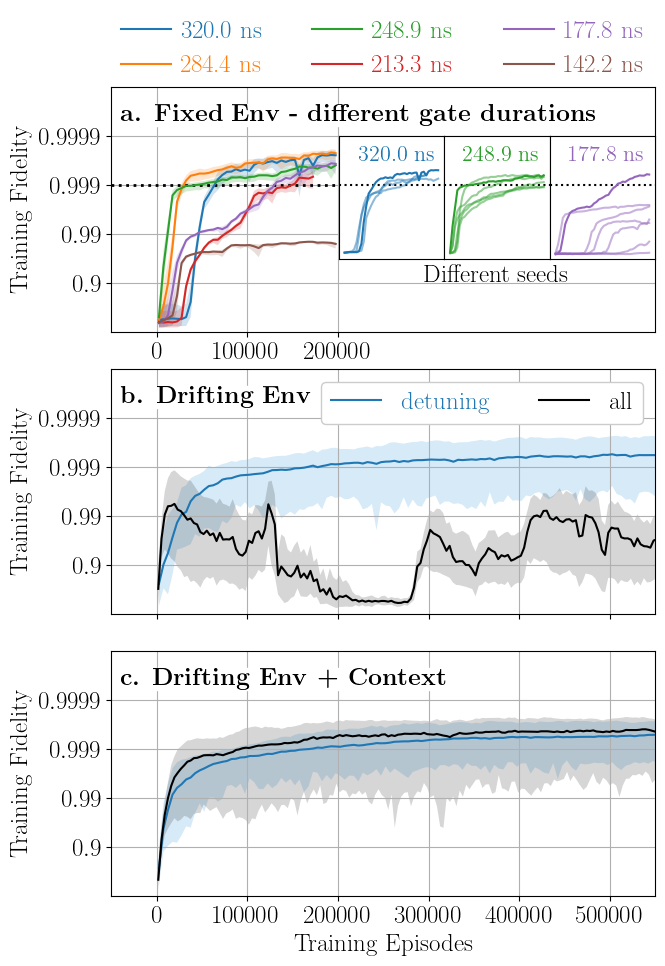

In [362]:
fig, axs = plt.subplots(3,1,figsize=(7,10))
imax = 40

############ 1ST PLOT ##############
axs[0].hlines(3,-5e4,5.5e5,'k',ls=':',linewidth=2)
for i,data in enumerate(datas[0]):
    # x = smooth(data['timesteps_total'])
    x = smooth(data['episodes_total'])[:imax]
    axs[0].plot(x,smooth(data['episode_reward_mean'])[:imax],label=f'{gatetimes[i]:.1f} ns')
    axs[0].fill_between(x,smooth(data['episode_reward_min'])[:imax],smooth(data['episode_reward_max'])[:imax],
                        alpha=0.2)

 # axs[0].legend(loc='lower right',framealpha=1,ncol=3,handletextpad=0.4,columnspacing=0.5)
axs[0].legend(loc=[0,1],framealpha=0,ncol=3,handletextpad=0.4,labelcolor='linecolor')

##INSET##
for i in range(3):
    axins = axs[0].inset_axes([0.418+i*0.194,0.3,0.194,0.5])
    axins.hlines(3,-0.1e5,2.1e5,'k',ls=':',linewidth=1.5)
    for j,data in enumerate(inset_datas[i]):
        alpha = 1 if j==0 else 0.5
        x = smooth(data['episodes_total'])[:imax]
        axins.plot(x,smooth(data['episode_reward_mean'])[:imax],f'C{2*i}',alpha=alpha)
    # axins.set_xticks([2e5])
    # axins.set_xticklabels(['2e5'])
    axins.set_xticks([])
    # axins.set_xticklabels([])
    axins.set_yticks(np.arange(1,5,1))
    axins.set_yticklabels([])
    # axins.grid()
    axins.tick_params(left=False,bottom=False)
    axins.set_ylim(0,5)
    axins.set_xlim(-0.1e5,2.1e5)
    axins.text(3e4,4,f'{gatetimes[2*i]:.1f} ns',color=f'C{2*i}',fontsize=16)
    if i == 1:
        # axins.set_title('Multiple seeds',fontsize=14)
        axins.set_xlabel('Different seeds')
##INSET##


############ 2ND PLOT ##############

ls = ['','']
cs = ['C0','k']
# labels = ['detuning','detuning - context','all','all - context']
labels = ['detuning','all']
for plotid in [1,2]:
    for i,data in enumerate(datas[plotid]):
        x = smooth(data['episodes_total'])
        # x = smooth(data['timesteps_total'])
        axs[plotid].plot(x,smooth(data['episode_reward_mean']),
                    ls[i],color=cs[i],linewidth=1.5,label=labels[i])
        axs[plotid].fill_between(x,smooth(data['episode_reward_min']),smooth(data['episode_reward_max']),
                            ls=ls[i],facecolor=lighten_color(cs[i],0.8,0.2))    

    # axs[plotid].legend(ncol=2,framealpha=1)
# axs[2].legend(ncol=2,framealpha=0,loc=[0,0.98],labelcolor='linecolor')
axs[1].legend(ncol=2,framealpha=1,loc='upper right',labelcolor='linecolor')

texts = ['\\textbf{a. Fixed Env - different gate durations}',
         '\\textbf{b. Drifting Env}',
         '\\textbf{c. Drifting Env + Context}']

for i,ax in enumerate(axs):
    ax.text(-4e4,4.3, texts[i], horizontalalignment='left',
                bbox=dict(facecolor='white', edgecolor='white', boxstyle='square,pad=0'))
    ax.set_ylabel('Training Fidelity')
    ax.set_ylim(0,5)
    ax.set_xlim(-5e4,5.5e5)
    # ax.set_xlim(-5e5,10.5e6)
    ax.set_yticks(np.arange(1,5,1))
    ax.set_yticklabels(['$0.9$','$0.99$','$0.999$','$0.9999$'])
    if i == 0:
        ax.set_xticks([0,1e5,2e5])
    if i == 1:
        ax.set_xticklabels([])
    ax.grid()
axs[2].set_xlabel('Training Episodes')

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0.15)
plt.savefig('figs/learning_curves.pdf',format='pdf',bbox_inches='tight')

In [29]:
1-10**(-2.5)

0.9968377223398316

In [26]:
data['episodes_total'][:100]

array([  32.,   68.,  104.,  140.,  176.,  212.,  248.,  284.,  320.,
        356.,  392.,  428.,  464.,  500.,  532.,  568.,  604.,  640.,
        676.,  712.,  748.,  784.,  820.,  856.,  892.,  928.,  964.,
       1000., 1032., 1068., 1104., 1140., 1176., 1212., 1248., 1284.,
       1320., 1356., 1392., 1428., 1464., 1500., 1532., 1568., 1604.,
       1640., 1676., 1712., 1748., 1784., 1820., 1856., 1892., 1928.,
       1964., 2000., 2032., 2068., 2104., 2140., 2176., 2212., 2248.,
       2284., 2320., 2356., 2392., 2428., 2464., 2500., 2532., 2568.,
       2604., 2640., 2676., 2712., 2748., 2784., 2820., 2856., 2892.,
       2928., 2964., 3000., 3032., 3068., 3104., 3140., 3176., 3212.,
       3248., 3284., 3320., 3356., 3392., 3428., 3464., 3500., 3532.,
       3568.])

In [27]:
x[1:]-x[:-1]

array([3571.44, 3571.44, 3571.44, 3571.44, 3571.44, 3571.44, 3571.36,
       3571.44, 3571.44, 3571.45, 3571.54, 3571.47, 3571.5 , 3571.72,
       3571.6 , 3571.49, 3571.5 , 3571.68, 3571.54, 3571.55, 3571.49,
       3571.44, 3571.55, 3571.52, 3571.8 , 3571.97, 3571.77, 3571.77,
       3571.58, 3571.77, 3571.91, 3571.94, 3571.9 , 3571.76, 3572.18,
       3571.79, 3571.8 , 3571.63, 3571.79, 3571.82, 3571.69, 3572.11,
       3572.48, 3573.28, 3572.25, 3572.16, 3572.11, 3572.34, 3572.87,
       3573.73, 3573.11, 3573.4 , 3575.08, 3574.18, 3575.23, 3575.3 ,
       3575.8 , 3576.73, 3577.8 , 3577.27, 3577.14, 3578.12, 3577.81,
       3577.17, 3577.88, 3578.98, 3579.73, 3578.8 , 3580.63, 3580.41,
       3578.7 , 3577.77, 3577.94, 3580.98, 3581.06, 3580.36, 3579.79,
       3578.49, 3577.7 , 3577.32, 3579.91, 3580.84, 3582.16, 3581.97,
       3580.17, 3579.84, 3582.64, 3584.85, 3587.23, 3586.71, 3586.17,
       3586.27, 3586.37, 3586.75, 3584.27, 3583.68, 3588.78, 3591.82,
       3591.4 , 3589

# Extra results for chan012

In [50]:
runs1 = ['0076','0160','0204',5141,1781,4108]
runs2 = ['0911',9865,5181,6921,'0480','0881']
datas = [[get_eventlog(run) for run in runs1],
         [get_eventlog(run) for run in runs2]]

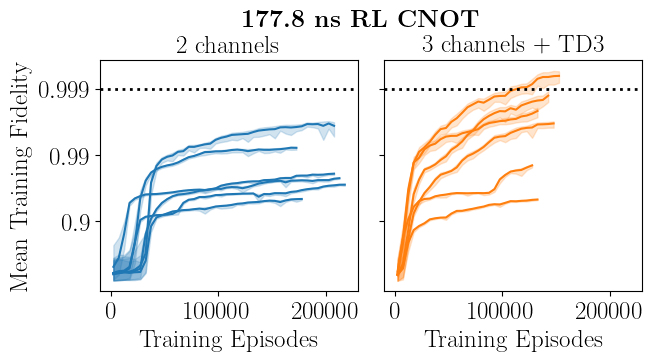

In [60]:
fig, axs = plt.subplots(1,2,figsize=(7,3),sharey=True,gridspec_kw={'wspace':0.1})
imax = int(1e5)
titles = ['2 channels','3 channels + TD3']
############ 1ST PLOT ##############
for i in range(2):
    for j,data in enumerate(datas[i]):
        # x = smooth(data['timesteps_total'])    
        x = smooth(data['episodes_total'])[:imax]
        axs[i].plot(x,smooth(data['episode_reward_mean'])[:imax],f'C{i}')
        axs[i].fill_between(x,smooth(data['episode_reward_min'])[:imax],smooth(data['episode_reward_max'])[:imax],
                            alpha=0.2,color=f'C{i}')        
axs[0].set_yticks(np.arange(1,5,1))
axs[0].set_yticklabels(['$0.9$','$0.99$','$0.999$','$0.9999$'])
axs[0].set_ylabel('Mean Training Fidelity')
for i,ax in enumerate(axs):
    ax.set_title(titles[i],fontsize=18)
    ax.hlines(3,-1e4,2.3e5,'k',ls=':',linewidth=2)
    ax.set_xlim(-1e4,2.3e5)
    ax.set_xlabel('Training Episodes')
fig.suptitle('\\textbf{177.8 ns RL CNOT}',y=1.05,fontsize=18)
# plt.savefig('figs/3channels_td3.pdf',format='pdf',bbox_inches='tight')
plt.savefig('figs/3channels_td3.svg',bbox_inches='tight')

# Transfer learning

In [290]:
runs1 = ['3723*/*2e-3*seed2','3723*/*2e-3*seed1','3723*/*2e-3*seed3']
runs2 = ['3723*/*noiseless*seed3','3723*/*noiseless*seed1','3723*/*noiseless*seed2']
runs3 = [4642,1983,7547]
datas = [[get_eventlog(run) for run in runs1],
         [get_eventlog(run) for run in runs2],
         [get_eventlog(run) for run in runs3]]

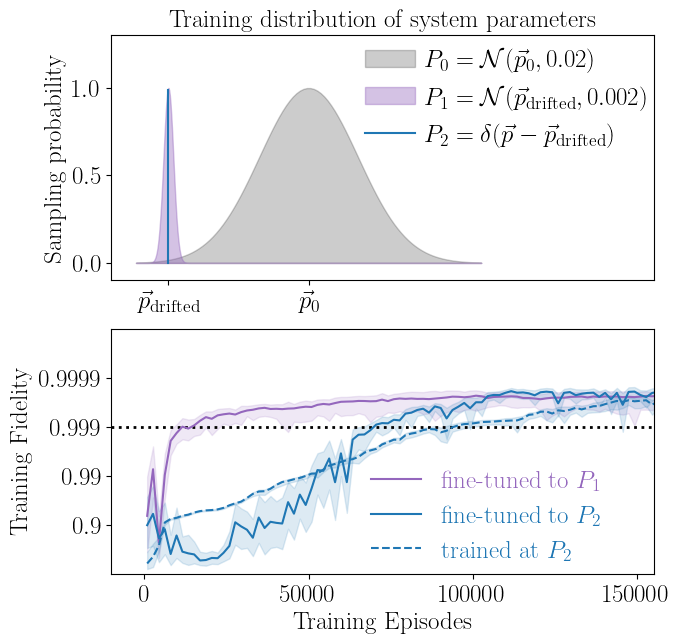

In [347]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

fig, axs = plt.subplots(2,1,figsize=(7,7),gridspec_kw={'hspace':0.2})

x = np.linspace(-7,7,100)
axs[0].fill_between(x,0,gaussian(x,0,2),color='k',alpha=0.2,label=r'$P_0 = \mathcal{N}(\vec{p}_0,0.02)$')
x = np.linspace(-7,7,500)
axs[0].fill_between(x,0,gaussian(x,drifted,0.2),color='C4',alpha=0.4,
                    label=r'$P_1 = \mathcal{N}(\vec{p}_{\rm drifted},0.002)$')
y = np.linspace(0,0.99,100)
axs[0].plot([drifted]*len(y),y,'C0',label=r'$P_2 = \delta(\vec{p}-\vec{p}_{\rm drifted})$')

axs[0].set_title('Training distribution of system parameters',fontsize=18)
axs[0].set_ylim(-0.1,1.3)
axs[0].set_xlim(-8,14)
axs[0].set_xticks([drifted,0])
axs[0].set_xticklabels([r'$\vec{p}_{\rm drifted}$',r'$\vec{p}_0$'])
# axs[0].set_yticks([])
axs[0].set_ylabel('Sampling probability')
axs[0].legend(loc=(0.45,0.5),edgecolor='white',framealpha=0,handletextpad=0.4)

axs[1].hlines(3,-1e4,2.3e5,'k',ls=':',linewidth=2)
imax = 100
binsize = 50
colors = ['C4','C0','C0']
ls = ['','','--']
labels = [r'fine-tuned to $P_1$',
          r'fine-tuned to $P_2$',
          r'trained at $P_2$']
for i in range(3):
    # for j,data in enumerate(datas[i]):
    for j,data in enumerate(datas[i][:1]):
        x = smooth(data['timesteps_total'],binsize)[:imax]/28    
        # x = smooth(data['episodes_total'],binsize)[:imax]
        y = smooth(data['episode_reward_mean'],binsize)[:imax]
        axs[1].plot(x,y,colors[i]+ls[i],label=labels[i])
        axs[1].fill_between(x,smooth(data['episode_reward_min'],binsize)[:imax],
                            smooth(data['episode_reward_max'],binsize)[:imax],
                            alpha=0.15,color=colors[i])  
        # print(data['timesteps_total'][abs(data['episode_reward_mean']-3).argmin()]/28)
        # ind = abs(y-3).argmin()
        # axs[1].plot(x[ind],y[ind],colors[i]+'X',markersize=10)
        
axs[1].set_yticks(np.arange(1,5,1))
axs[1].set_yticklabels(['$0.9$','$0.99$','$0.999$','$0.9999$'])
axs[1].set_ylabel('Training Fidelity')
axs[1].set_xlim(-1e4,1.55e5)
axs[1].set_ylim(0,5)
axs[1].set_xlabel('Training Episodes')
axs[1].set_xticks([0,50000,100000,150000])
axs[1].legend(loc=[0.46,0.01],edgecolor='white',framealpha=0,labelcolor='linecolor')
plt.savefig('figs/transfer_learning.svg',bbox_inches='tight')

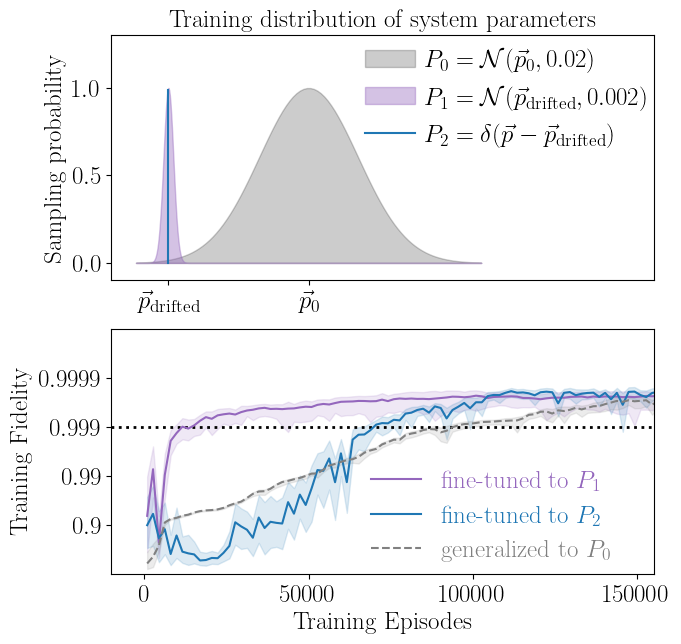

In [356]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

fig, axs = plt.subplots(2,1,figsize=(7,7),gridspec_kw={'hspace':0.2})

x = np.linspace(-7,7,100)
axs[0].fill_between(x,0,gaussian(x,0,2),color='k',alpha=0.2,label=r'$P_0 = \mathcal{N}(\vec{p}_0,0.02)$')
x = np.linspace(-7,7,500)
axs[0].fill_between(x,0,gaussian(x,drifted,0.2),color='C4',alpha=0.4,
                    label=r'$P_1 = \mathcal{N}(\vec{p}_{\rm drifted},0.002)$')
y = np.linspace(0,0.99,100)
axs[0].plot([drifted]*len(y),y,'C0',label=r'$P_2 = \delta(\vec{p}-\vec{p}_{\rm drifted})$')

axs[0].set_title('Training distribution of system parameters',fontsize=18)
axs[0].set_ylim(-0.1,1.3)
axs[0].set_xlim(-8,14)
axs[0].set_xticks([drifted,0])
axs[0].set_xticklabels([r'$\vec{p}_{\rm drifted}$',r'$\vec{p}_0$'])
# axs[0].set_yticks([])
axs[0].set_ylabel('Sampling probability')
axs[0].legend(loc=(0.45,0.5),edgecolor='white',framealpha=0,handletextpad=0.4)

axs[1].hlines(3,-1e4,2.3e5,'k',ls=':',linewidth=2)
imax = 100
binsize = 50
colors = ['C4','C0','gray']
ls = ['','','--']
labels = [r'fine-tuned to $P_1$',
          r'fine-tuned to $P_2$',
          r'generalized to $P_0$']
for i in range(3):
    # for j,data in enumerate(datas[i]):
    for j,data in enumerate(datas[i][:1]):
        x = smooth(data['timesteps_total'],binsize)[:imax]/28    
        # x = smooth(data['episodes_total'],binsize)[:imax]
        y = smooth(data['episode_reward_mean'],binsize)[:imax]
        axs[1].plot(x,y,ls[i],color=colors[i],label=labels[i],alpha=1)
        axs[1].fill_between(x,smooth(data['episode_reward_min'],binsize)[:imax],
                            smooth(data['episode_reward_max'],binsize)[:imax],
                            alpha=0.15,color=colors[i])  
        # print(data['timesteps_total'][abs(data['episode_reward_mean']-3).argmin()]/28)
        # ind = abs(y-3).argmin()
        # axs[1].plot(x[ind],y[ind],colors[i]+'X',markersize=10)
        
axs[1].set_yticks(np.arange(1,5,1))
axs[1].set_yticklabels(['$0.9$','$0.99$','$0.999$','$0.9999$'])
axs[1].set_ylabel('Training Fidelity')
axs[1].set_xlim(-1e4,1.55e5)
axs[1].set_ylim(0,5)
axs[1].set_xlabel('Training Episodes')
axs[1].set_xticks([0,50000,100000,150000])
axs[1].legend(loc=[0.46,0.01],edgecolor='white',framealpha=0,labelcolor='linecolor')
plt.savefig('figs/transfer_learning_other.svg',bbox_inches='tight')

In [296]:
print(93767.85714285714/68767.85714285714)
print(93767.85714285714/11625.0)


1.3635419371591795
8.06605222734255


In [223]:
datas[1][0]['episodes_total']-10200*28

array([ 79218.,  79254.,  79290., ..., 250542., 250578., 250614.])

In [87]:
drift = pickle.load(open(f'../data/valencia10_drift_1.pkl', 'rb'))
drifted = -abs(np.hstack(list(drift.values()))).max()*100

In [85]:
abs(np.hstack(list(drift.values()))).max()

0.05684035162614872

In [86]:
drift

{'drive': array([-0.00722279,  0.02263578, -0.0283148 , -0.02048592]),
 'detune': array([-0.05684035,  0.05331411]),
 'anharm': array([-0.04396466,  0.05445264]),
 'coupling': array([0.04959622]),
 'freq': array([0.0398136, 0.0407063])}

dict_keys(['episode_reward_mean', 'timesteps_total'])


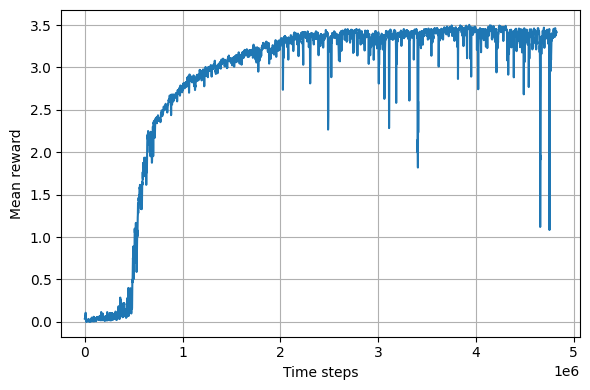

In [14]:
run, savename = '7352', 'ZXp90_chan12_rl_worst'
visualize(run, savename)

dict_keys(['episode_reward_mean', 'timesteps_total'])


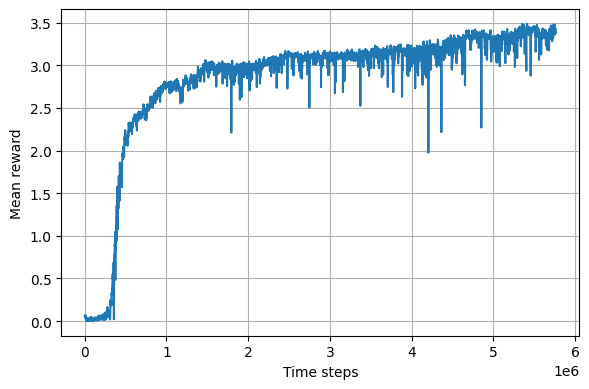

In [15]:
run, savename = '5400', 'CNOT_chan12_rl_worst'
visualize(run, savename)

dict_keys(['episode_reward_mean', 'timesteps_total'])


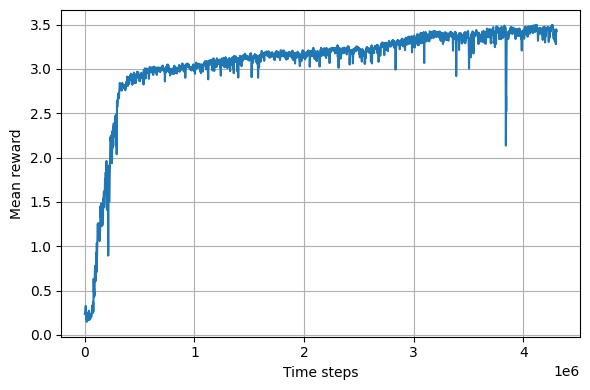

In [12]:
run, savename = '2520', 'ZXp90_chan12_rl_avg'
visualize(run, savename)

dict_keys(['episode_reward_mean', 'timesteps_total'])


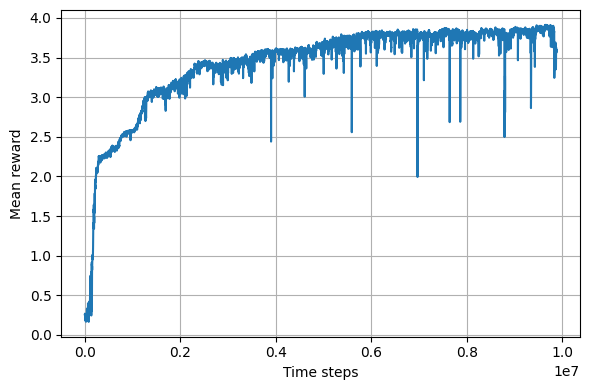

In [13]:
run, savename = '3280', 'CNOT_chan12_rl_avg'
visualize(run, savename)

dict_keys(['episode_reward_mean', 'timesteps_total'])


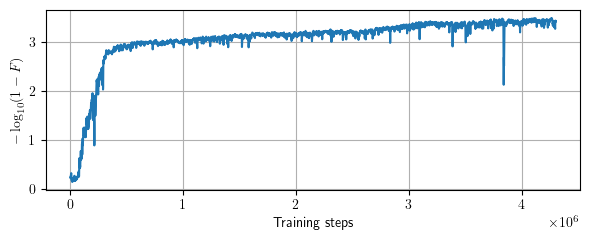

In [8]:
plt.rcParams.update({
    "text.usetex": True,
})
run, savename = '2520', 'ZXp90_1120dt_chan12_rl_avg_2520'
visualize(run, savename)